In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import kraft

n_element: 10
n_skip: 0
n_top: 2
rate_top_hit: 1


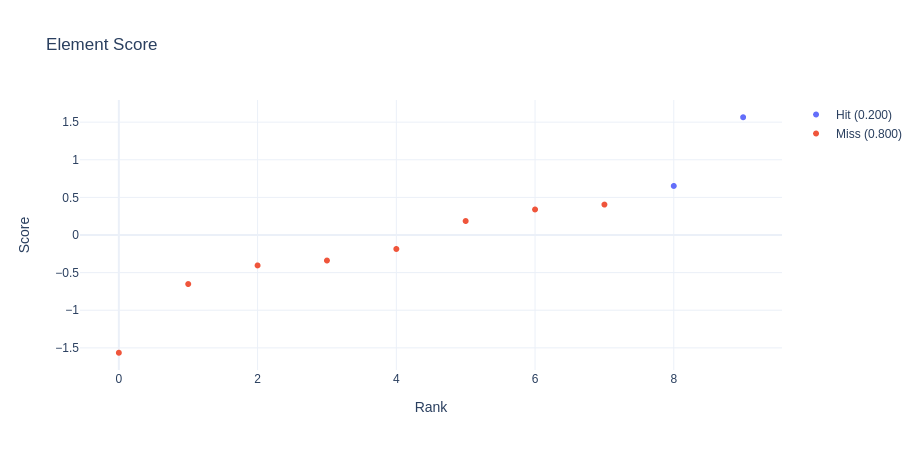

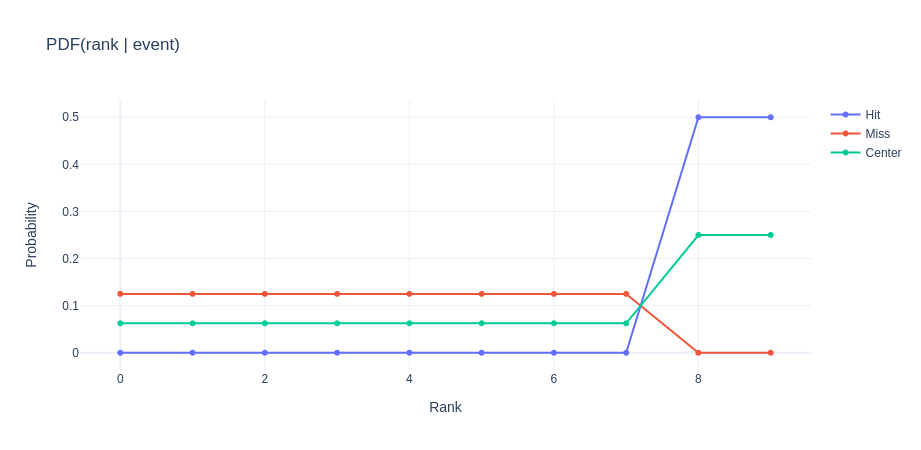

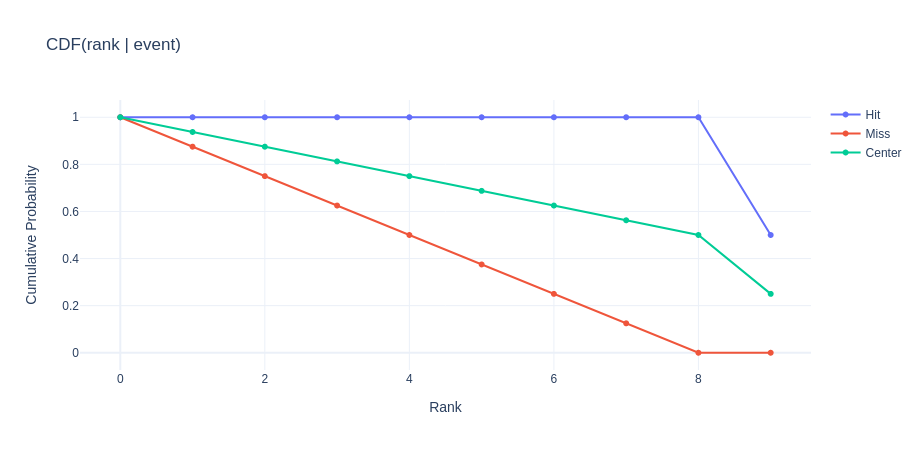

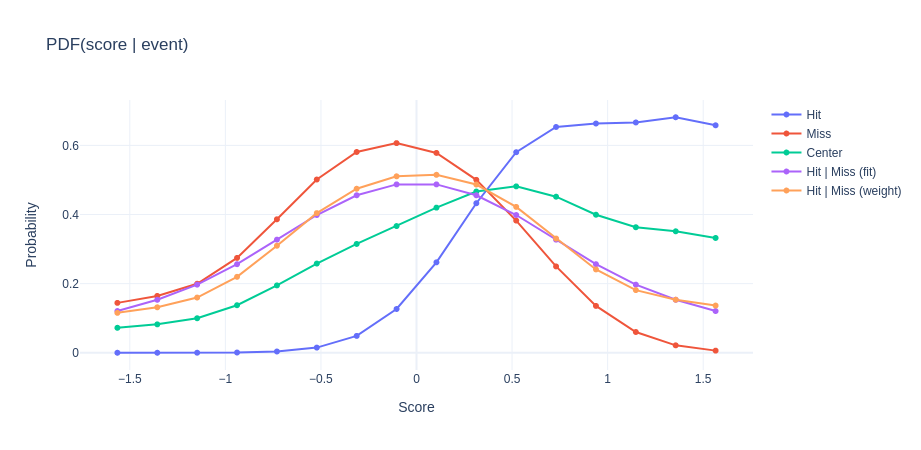

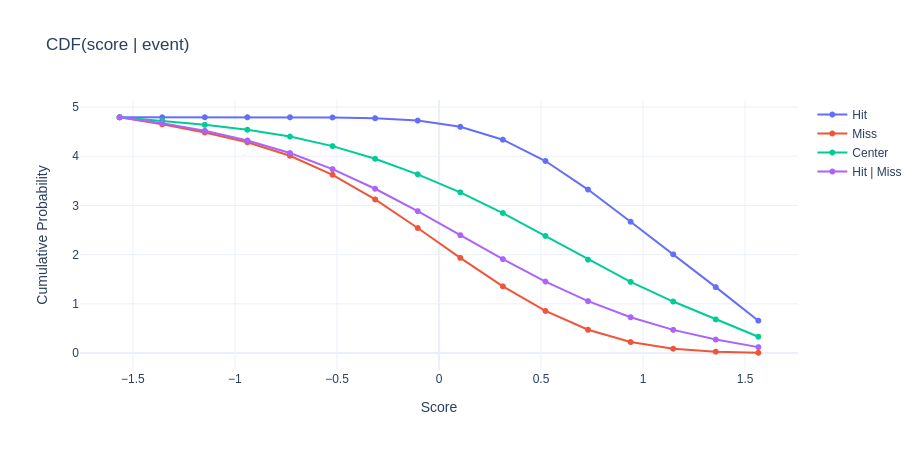

/home/kwat/github/kraft/kraft/compute_set_enrichment.py:242: RuntimeWarning:

divide by zero encountered in log

/home/kwat/github/kraft/kraft/compute_set_enrichment.py:242: RuntimeWarning:

invalid value encountered in multiply



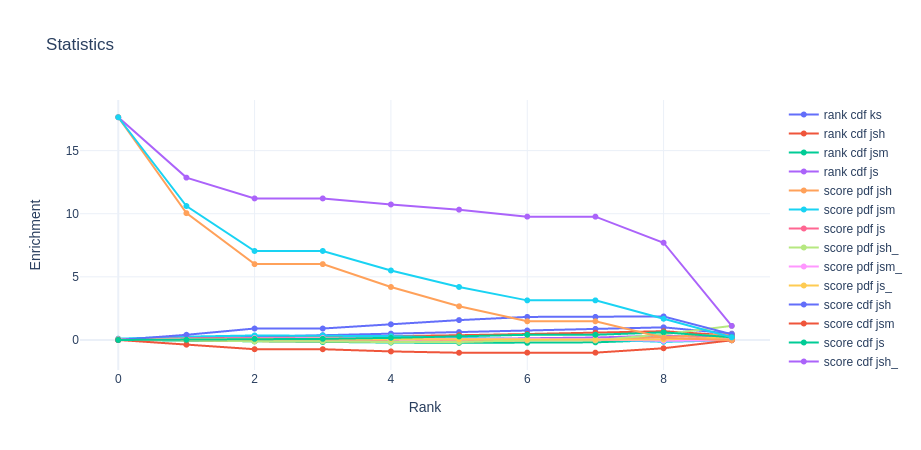

In [8]:
for sides in (
#     ("-"),
    ("+",),
#     ("-", "+"),
):

    for n_element in (10,):

        np.random.seed(seed=2012)

        element_score = np.random.normal(size=n_element // 2)
        
        element_score = pd.Series(
            np.sort(np.concatenate((element_score, -element_score))),
            index=("Element{}".format(i) for i in range(n_element)),
        )

        for n_skip in (0,):

            if n_skip < 1:

                n_skip = int(n_skip * n_element)

            for n_top in (2,):

                if n_top < 1:

                    n_top = int(n_top * n_element)

                for rate_top_hit in (1,):

                    if rate_top_hit < 1:

                        rate_top_hit = int(rate_top_hit * n_top)

                    print("n_element: {}".format(n_element))

                    print("n_skip: {}".format(n_skip))

                    print("n_top: {}".format(n_top))

                    print("rate_top_hit: {}".format(rate_top_hit))

                    set_elements_ = []

                    if "-" in sides:

                        set_elements_ += element_score.index[
                            n_skip : n_skip + n_top : rate_top_hit
                        ].tolist()

                    if "+" in sides:

                        set_elements_ += element_score.index[
                            -(n_skip + 1) : -(n_skip + 1 + n_top) : -rate_top_hit
                        ][::-1].tolist()

                    enrichment = kraft.compute_set_enrichment(
                        element_score,
                        set_elements_,
                        None,
                    )

In [ ]:
element_score = pd.read_csv(
    "/Users/kwatme/Downloads/gsea/benchmark4.gene.list.GSEA.txt",
    sep="\t",
    usecols=("gene.list", "gene.scores"),
    index_col=0,
    squeeze=True,
)

In [ ]:
set_elements = kraft.read_gmt("/Users/kwatme/Downloads/gsea/c2.all.v5.1.symbols.gmt")

In [ ]:
set_elements_ = set_elements["COLLER_MYC_TARGETS_UP"]

method = "rank cdf ks"

kraft.compute_set_enrichment(element_score, set_elements_, method=method)

In [ ]:
n = 10

a = np.arange(1, n) / n

b = a[::-1]

c = (a + b) / 2

jsa = a * np.log(a / c)

jsb = b * np.log(b / c)

js = jsa + jsb

kraft.plot_plotly_figure(
    {
        "data": [
            {"name": "A", "y": a},
            {"name": "B", "y": b},
            {"name": "Center", "y": c},
            {"name": "JS A", "y": jsa,},
            {"name": "JS B", "y": jsb},
            {"name": "JS", "y": js},
        ]
    }
)

In [ ]:
a = np.asarray([0, 0, 0, 1, 1, 1])

b = np.arange(a.size)

p_0 = (a == 0).sum() / a.size

p_1 = (a == 1).sum() / a.size

b_0 = b[a == 0]

b_1 = b[a == 1]

p_b = kraft.estimate_element_x_dimension_kernel_density(
    b.reshape((b.size, 1)),
    dimension_grid_mins=(b.min(),),
    dimension_grid_maxs=(b.max(),),
    dimension_fraction_grid_extensions=(1e-3,),
    dimension_n_grids=(8,),
)[1]

p_b_0 = kraft.estimate_element_x_dimension_kernel_density(
    b_0.reshape((b_0.size, 1)),
    dimension_grid_mins=(b.min(),),
    dimension_grid_maxs=(b.max(),),
    dimension_fraction_grid_extensions=(1e-3,),
    dimension_n_grids=(8,),
)[1]

p_b_1 = kraft.estimate_element_x_dimension_kernel_density(
    b_1.reshape((b_1.size, 1)),
    dimension_grid_mins=(b.min(),),
    dimension_grid_maxs=(b.max(),),
    dimension_fraction_grid_extensions=(1e-3,),
    dimension_n_grids=(8,),
)[1]

js = p_0 * kraft.compute_kullback_leibler_divergence(
    p_b_0, p_b
) + p_1 * kraft.compute_kullback_leibler_divergence(p_b_1, p_b)

print(js.sum())

In [ ]:
grid, pab = kraft.compute_element_x_dimension_joint_probability(
    np.asarray((a, b)).T,
    dimension_grid_mins=(a.min(), b.min()),
    dimension_grid_maxs=(a.max(), b.max()),
    dimension_fraction_grid_extensions=(1e-3, 1e-3),
    dimension_n_grids=(8, 8),
)

p_ab = p_ab.reshape((8, 8))

p_a_p_b = np.outer(p_a, p_b)

In [ ]:
grid[:, 0]
grid[:, 1]

In [ ]:
pxpy = asarray((px,) * n_grid).T * asarray((py,) * n_grid)

In [ ]:
(p_ab * np.log(p_ab / p_a_p_b)).sum().sum()